In [68]:
import numpy as np
from scipy.stats import unitary_group
from functools import reduce
np.set_printoptions(linewidth=130)


In [118]:
import numpy as np
from scipy.stats import unitary_group
from functools import reduce
np.set_printoptions(linewidth=130)

U1 = unitary_group.rvs(4).reshape(2,2,2,2);
U2 = unitary_group.rvs(4).reshape(2,2,2,2);
U3 = unitary_group.rvs(4).reshape(2,2,2,2);

U1_ = U1.reshape(4,4).conj().T.reshape(2,2,2,2)
U2_ = U2.reshape(4,4).conj().T.reshape(2,2,2,2)
U3_ = U3.reshape(4,4).conj().T.reshape(2,2,2,2)

T1 = lambda U1, U2, U3: np.einsum(
    U1, [12,13,8,9],
    U2, [14,15,7,12],
    U2, [16,17,13,10],
    U3, [0,1,6,14],
    U3, [2,3,15,16],
    U3, [4,5,17,11],
    [0,1,2,3,4,5,6,7,8,9,10,11]
)

T2 = lambda U1_, U2_, U3_: np.einsum(
    U3_, [0,12,6,7],
    U3_, [13,14,8,9],
    U3_, [15,5,10,11],
    U2_, [1, 16,12,13],
    U2_, [17,4,14,15],
    U1_, [2,3,16,17],
    [0,1,2,3,4,5,6,7,8,9,10,11]
)

###########################################################
# Test that T1 and T2 are inverses of eachother
###########################################################


I = np.einsum(
    T1(U1,U2,U3), [0,1,2,3,4,5,12,13,14,15,16,17],
    T2(U1_,U2_,U3_), [12,13,14,15,16,17,6,7,8,9,10,11],
    [0,1,2,3,4,5,6,7,8,9,10,11]
)

assert np.allclose(T1(U1,U2,U3).reshape(64,64) @ T2(U1_,U2_,U3_).reshape(64,64), np.eye(64))
assert np.allclose(I.reshape(64,64), np.eye(64))
############################################################
#
###########################################################
T3 = lambda T1, T2: np.einsum(
    T1, [0,1,2,3,4,5,12,13,16,17,18,19],
    T2, [14,15,16,17,18,19,6,7,8,9,10,11],
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
)

T4 = lambda U1,U2,U3,U1_,U2_,U3_: np.einsum(
    U3_, [10,12,4,5],
    U2_, [11,13,12,6],
    U1_, [14,15,13,7],
    U1,  [16,3,14,15],
    U2,  [17,2,9,16],
    U3,  [0,1,8,17],
    [0,1,2,3,4,5,6,7,8,9,10,11]
)
##################################
# test that T4 works as expcted
##################################


assert np.allclose(T4(np.eye(4).reshape(2,2,2,2), U2, U3, np.eye(4).reshape(2,2,2,2), U2_, U3_)[0,0,0,0,0,0,0,0,...].reshape(4,4), T4(U1, U2, U3, U1_, U2_, U3_)[0,0,0,0,0,0,0,0,...].reshape(4,4))
#####################################
#
#####################################

T5 = lambda T3, T4: np.einsum(
    T3, [2,3,4,5,6,7,10,11,12,13,14,15,21,20,23,22],
    T4, [0,1,21,20,8,9,23,22,16,17,18,19],
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
)

T5R = lambda T5: np.round(T5[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...].reshape(4,4),4)
T3R = lambda T3: np.round(T3[0,0,0,0,0,0,0,0,0,0,0,0,...].reshape(4,4),4)


U = [U1,U2,U3,U1_,U2_,U3_]

t1 = T1(*U[:3])
t2 = T2(*U[3:])
t3 = T3(t1,t2)
t4 = T4(*U)
t5 = T5(t3, t4)
t5r = T5R(t5)
t3r = T3R(t3)

assert(np.allclose(t5r, t3r))

def rfp(U): #right fixed point
    t1 = T1(*U[:3])
    t2 = T2(*U[3:])
    t3 = T3(t1,t2)
    t4 = T4(*U)
    t5 = T5(t3, t4)
    t5r = T5R(t5)
    t3r = T3R(t3)
    return t5r, t3r

t5r1, t3r1 = rfp(U)

assert np.allclose(t5r1, t3r1)



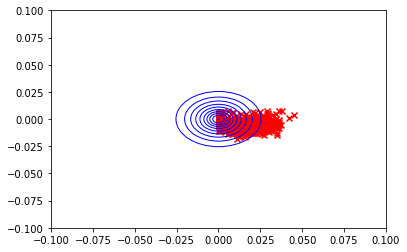

In [113]:
import matplotlib.pyplot as plt

total = []
for _ in range(1000):
    U1 = unitary_group.rvs(4).reshape(2,2,2,2);
    U2 = unitary_group.rvs(4).reshape(2,2,2,2);
    U3 = unitary_group.rvs(4).reshape(2,2,2,2);

    M1 = np.random.rand(4,4) + 1j * np.random.rand(4,4)
    B1 = 0.5 * (M1 - M1.conj().T)*0.05
    M2 = np.random.rand(4,4) + 1j * np.random.rand(4,4)
    B2 = 0.5 * (M2 - M2.conj().T)*0.05
    M3 = np.random.rand(4,4) + 1j * np.random.rand(4,4)
    B3 = 0.5 * (M3 - M3.conj().T)*00.5

    U1_ = (((np.eye(4) - B1)@U1.reshape(4,4)).conj().T).reshape(2,2,2,2)
    U2_ = (((np.eye(4) - B2)@U2.reshape(4,4)).conj().T).reshape(2,2,2,2)
    U3_ = (((np.eye(4) - B3)@U3.reshape(4,4)).conj().T).reshape(2,2,2,2)

    U = [U1,U2,U3,U1_,U2_,U3_]

    a,b = rfp(U)
    
    diff = a - b
    
    frob_norm = (np.sum(diff**2)**0.5)/16
    total.append(frob_norm)
    
circle_radii = np.sort(np.abs(total))[::int(len(total)/10)]

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
for z in total:
    ax.scatter(z.real, z.imag, c = 'r', marker = 'x')
    
for s in circle_radii:
    circle = plt.Circle((0, 0), s, color='b', fill = False)
    ax.add_artist(circle)

plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)
plt.show()

In [120]:
#####################
# U' = U
#####################

U1 = unitary_group.rvs(4).reshape(2,2,2,2)
U2 = unitary_group.rvs(4).reshape(2,2,2,2)
U3 = unitary_group.rvs(4).reshape(2,2,2,2)

U1_ = U1.reshape(4,4).conj().T.reshape(2,2,2,2)
U2_ = U2.reshape(4,4).conj().T.reshape(2,2,2,2)
U3_ = U3.reshape(4,4).conj().T.reshape(2,2,2,2)

def eigs_of_transfer(a,b,c,a_,b_,c_):
    transfer_matrix = T4(a,b,c,a_,b_,c_)[0,0,:,:,0,0,...].reshape(16,16)
    return np.linalg.eig(transfer_matrix)

print(eigs_of_transfer(U1,U2,U3,U1_,U2_,U3_)[0])

[ 1.00000000e+00+3.33131317e-17j -1.03583987e-08-6.27187659e-10j  1.05102662e-08+5.81184210e-10j  1.91497754e-10-6.31355789e-09j
 -2.39234420e-09-4.14116163e-09j  3.62247728e-10+5.44201291e-09j  2.10866639e-09+3.56103448e-09j -2.65445957e-10+1.37469546e-09j
 -1.49241077e-10+8.39431169e-11j -7.24856364e-12+3.90371368e-11j  3.12776265e-14-1.44856528e-13j -3.12693737e-14+1.44853007e-13j
  2.02765052e-16-2.82746202e-16j -4.56384626e-17-3.16906035e-17j  2.53878637e-17+1.62748051e-18j -4.08609790e-17+1.04883396e-16j]


In [130]:
### matrices close to original matrices
from scipy.linalg import expm

U1 = unitary_group.rvs(4).reshape(2,2,2,2)
U2 = unitary_group.rvs(4).reshape(2,2,2,2)
U3 = unitary_group.rvs(4).reshape(2,2,2,2)

M1 = np.random.rand(4,4) + 1j * np.random.rand(4,4)
B1 = 0.5 * (M1 - M1.conj().T)
M2 = np.random.rand(4,4) + 1j * np.random.rand(4,4)
B2 = 0.5 * (M2 - M2.conj().T)
M3 = np.random.rand(4,4) + 1j * np.random.rand(4,4)
B3 = 0.5 * (M3 - M3.conj().T)

U1_ = ((expm(0.1 * B1)@ U1.reshape(4,4)).conj().T).reshape(2,2,2,2)
U2_ = ((expm(0.1 * B2)@ U2.reshape(4,4)).conj().T).reshape(2,2,2,2)
U3_ = ((expm(0.1 * B3)@ U3.reshape(4,4)).conj().T).reshape(2,2,2,2)

val,vec = eigs_of_transfer(U1,U2,U3,U1_,U2_,U3_)
print(val)

[ 0.98318148-0.06351333j -0.06753299+0.10444096j  0.06962585-0.0860046j  -0.0584612 -0.05509327j  0.06769179+0.04250967j
  0.02249528+0.04774921j -0.04799349+0.02282962j  0.01587745-0.03668945j  0.03347344+0.00459803j -0.02953931+0.00038609j
  0.00348171+0.01661439j -0.00259963-0.0160996j   0.00120522-0.00783732j -0.00390796-0.00603288j  0.00593276+0.00356676j
 -0.0042621 +0.00534011j]


In [123]:
### random matrices

from scipy.linalg import expm
U1 = unitary_group.rvs(4).reshape(2,2,2,2)
U2 = unitary_group.rvs(4).reshape(2,2,2,2)
U3 = unitary_group.rvs(4).reshape(2,2,2,2)

U1_ = unitary_group.rvs(4).reshape(2,2,2,2)
U2_ = unitary_group.rvs(4).reshape(2,2,2,2)
U3_ = unitary_group.rvs(4).reshape(2,2,2,2)

val,vec = eigs_of_transfer(U1,U2,U3,U1_,U2_,U3_)
print(val)

[-0.56352328-0.17964228j  0.23819557-0.47328633j  0.10861819+0.36235868j -0.1581886 -0.34842278j  0.27486982+0.02529948j
 -0.24802896+0.14058274j  0.20507394+0.05298744j  0.13329243-0.14857739j -0.08079582-0.18782934j -0.1537988 +0.09378332j
  0.09380176-0.0256466j  -0.02142699+0.108941j    0.02250941+0.07921295j -0.03324825-0.12777783j -0.13658345-0.04937398j
 -0.05714642-0.03909126j]
